In [3]:
#Esto me sirve para el correcto funcionamiento de las funciones importadas en este notebook
%load_ext autoreload
%autoreload 2

# Prueba final 

Cargamos los conjuntos de datos y librerías que se usarán en esta sección:

In [4]:
from utils.paths import crear_funcion_directorio
from utils.modeling import mostrar_podio_MVP
from utils.visualize import plotear_predvsreal
from utils.modeling import metricas_reg
from joblib import load
import pandas as pd

#Creo un acceso directo a la carpeta de data
data_dir = crear_funcion_directorio("data")

#Cargo los conjuntos de datos
X_test = pd.read_csv(data_dir("for_modeling", "X_test.csv"))
y_test = pd.read_csv(data_dir("for_modeling", "y_test.csv"))
df_data_jugadores_test = pd.read_csv(data_dir("processed", "df_data_jugadores_test.csv"))

#Cargo el modelo y el pipeline
pip = load(data_dir("for_modeling", "pipeline.joblib"))
forest_reg = load(data_dir("for_modeling", "forest_reg.joblib"))

## Generando predicciones sobre el conjunto de prueba

Ahora que tenemos un modelo que consideramos óptimo para nuestro problema, el siguiente y último paso es evaluarlo para ver como se comporta con datos que no vió en el entrenamiento. Por lo tanto procedemos a generar las predicciones:

In [5]:
#Estandarizo los datos de prueba
X_test_prepared = pip.transform(X_test)

#Tomo el modelo y hago las predicciones en test
y_test_pred = forest_reg.predict(X_test_prepared)

Ahora, al igual que hicimos con los datos de entrenamiento, vamos a evaluar las métricas de este modelo para el dataset de prueba:

In [6]:
metricas_reg(v_real= y_test, v_pred= y_test_pred)

,Métrica,Valor
0,Coeficiente de determinación (R²),0.679691
1,Varianza explicada,0.681434
2,MSE (Error Cuadrático Medio),0.021241
3,RMSE (Raíz del Error Cuadrático Medio),0.145744


De los valores obtenidos en las métricas podemos destacar que:

* No se alejaron demasiado de los obtenidos en entrenamiento, **lo cual es una buena señal**
* No son valores demasiado buenos, pero **aceptables** para el alcance de nuestro problema

Volvemos a generar el gráfico **y_train vs y_train_pred**, para ver como se comportó en los datos de prueba:

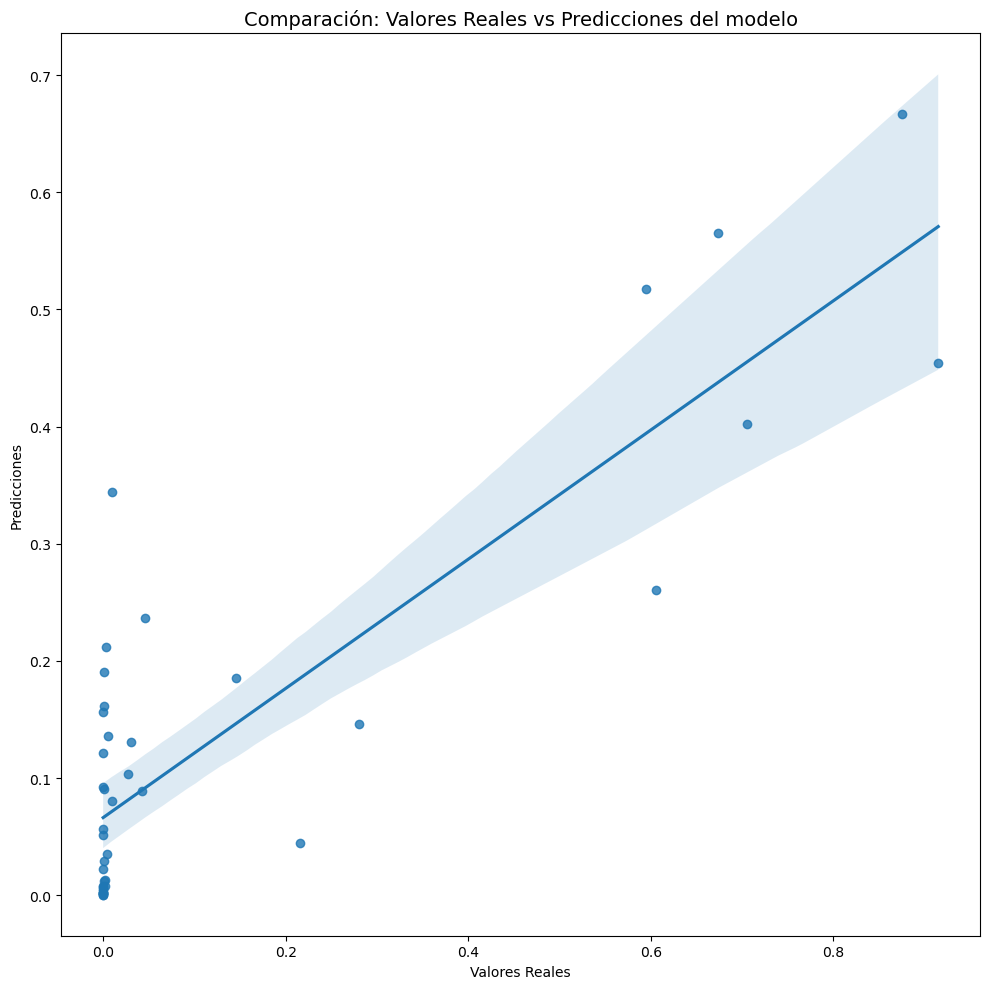

In [10]:
plotear_predvsreal(y_test, y_test_pred, tamanio= (10,10))

* Podemos ver que en lineas generales **se mantuvo el comportamiento visto en entrenamiento**, con menor incertidumbre a valores bajos y mayor a valores altos
* Para valores altos de los valores reales podemos ver que hay **más puntos por debajo de la recta**, podemos decir que el modelo **subestimó** la proporción de votos obtenida por 
  algunos ganadores

## Armando podios

Ahora como evaluación final, vamos a ver que tan bien nuestro modelo logra pocisionar a los jugadores reservados para la prueba para así luego sacar nuestras conclusiones sobre lo obtenido:

In [8]:
mostrar_podio_MVP(df_base= df_data_jugadores_test, columna_temporadas= 'season', columna_nombre= 'player', columna_votos= 'mvp_share', temporada= 2022, y_pred= y_test_pred, cant_jugadores= 5)

,season,player,mvp_share,y_pred
35,2022,Nikola Jokić,0.875,0.667209
15,2022,Giannis Antetokounmpo,0.595,0.517558
25,2022,Joel Embiid,0.706,0.402456
31,2022,LeBron James,0.001,0.190570
33,2022,Luka Dončić,0.146,0.185647


In [9]:
mostrar_podio_MVP(df_base= df_data_jugadores_test, columna_temporadas= 'season', columna_nombre= 'player', columna_votos= 'mvp_share', temporada= 2023, y_pred= y_test_pred, cant_jugadores= 5)

,season,player,mvp_share,y_pred
34,2023,Nikola Jokić,0.674,0.565089
24,2023,Joel Embiid,0.915,0.453959
32,2023,Luka Dončić,0.010,0.344209
14,2023,Giannis Antetokounmpo,0.606,0.260604
38,2023,Shai Gilgeous-Alexander,0.046,0.236961


De esta evaluación resaltamos lo siguiente:

* Se mantuvo la diferencia entre **'mvp_share'** y **'y_pred'**
* El modelo acertó al ganador del premio para la **temporada 21-22**, pero fallamos en la **22-23**


Aunque no acertamos en todos los casos (cosa que no está mal), este modelo posicionó a algunos jugadores en el podio que **resulta interesante discutir**
y tratar de deducir porque fueron colocados ahí, como en el caso de la **22-23** donde el modelo **da por ganador a Jokić**.